In [1]:
# Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import factor_analyzer as factor
import missingno as msgn

import lec7_graphs as gfx

import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

In [2]:
df = pd.read_csv('cep45.csv')
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [3]:
df.columns

Index(['corr', 'filtro', 'psu', 'region', 'p1_1', 'p1_2', 'p1_3', 'p2', 'p3',
       'p4',
       ...
       'de14_b', 'de14_c', 'de14_d', 'de14_e', 'de14_f', 'de15', 'de16',
       'de17', 'b5', 'pond'],
      dtype='object', length=188)

In [4]:
# Veamos todas aquellas columnas que contienen p17

trust_df = df.filter(regex='p17_*')

In [5]:
trust_df.sample()

,p17_a,p17_b,p17_c,p17_d,p17_e,p17_f,p17_g,p17_h,p17_i,p17_j,p17_k,p17_l,p17_m,p17_n
373,1,1,1,1,1,1,3,3,1,3,8,3,8,8


In [6]:
# Cambiando nombre de las columnas

trust_df = trust_df.rename(columns={
    'p17_a': 'I.Catolica', 'p17_b':'I.Evangelica',
    'p17_c':'FF.AA', 'p17_d':'Justicia',
    'p17_e':'Prensa', 'p17_f':'Television',
    'p17_g':'Sindicatos', 'p17_h':'Carabineros',
    'p17_i':'Gobierno', 'p17_j':'Partidos Politicos',
    'p17_k':'Congreeso', 'p17_l':'Empresas',
    'p17_m':'Universidades', 'p17_n':'Radio'
})

In [7]:
# Veamos datos perdidos

def fetch_missing(data, missing_vals = [8,9]):
    for colname, serie in data.iteritems(): #iteritms itera por columnas
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(3))
        

In [8]:
fetch_missing(trust_df)

I.Catolica 0.027
I.Evangelica 0.065
FF.AA 0.044
Justicia 0.042
Prensa 0.033
Television 0.017
Sindicatos 0.092
Carabineros 0.019
Gobierno 0.031
Partidos Politicos 0.033
Congreeso 0.047
Empresas 0.041
Universidades 0.073
Radio 0.025


<AxesSubplot:>

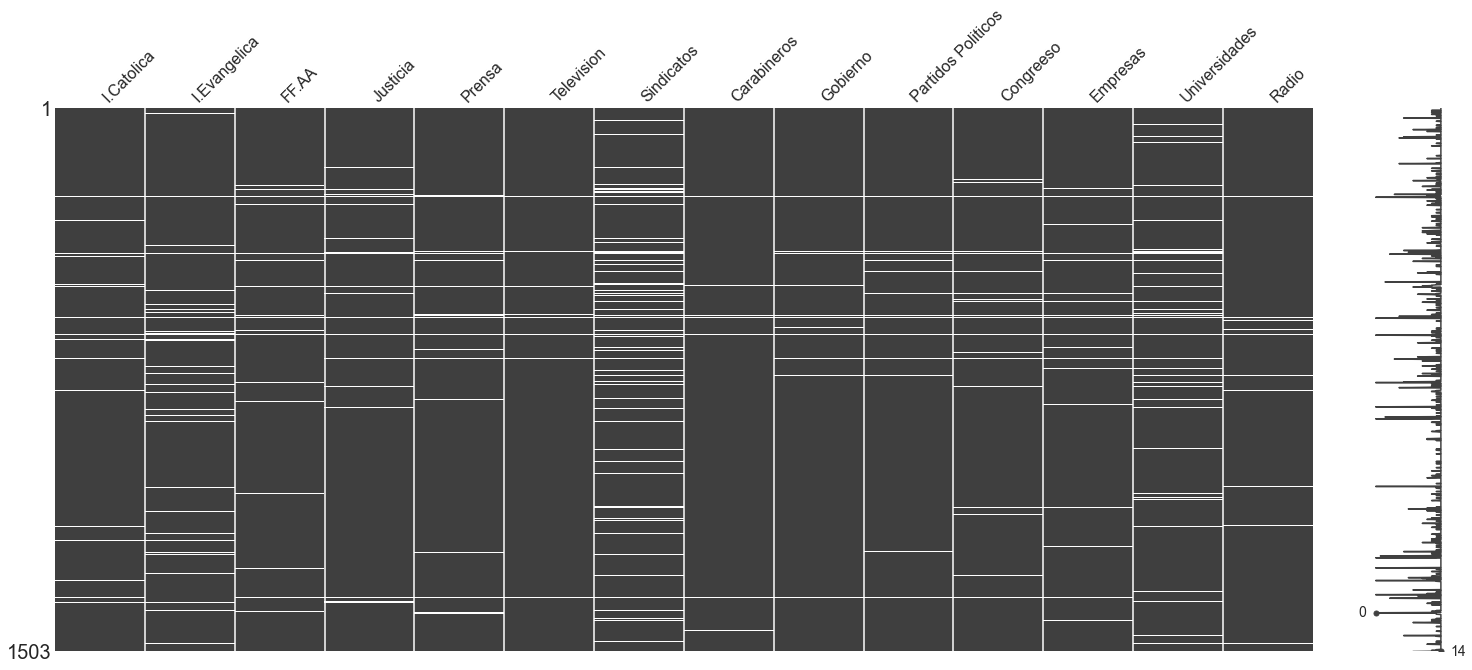

In [9]:
# Otra manera de visualizar datos perdidos

msgn.matrix(trust_df.replace([8,9], [np.nan, np.nan]))

- Se pude observar que existe una gran cantidad de datos perdidos en algunas variables, lo que implica que al hacer el estudio factorial, estas presenten una baja carga

In [10]:
# Veamos el comportamiento para las medias de cada uno de estos items

variable, mean = [], []

for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    
tmp_df = pd.DataFrame({'var': variable, 'mean': mean}).sort_values(by = ['mean'])

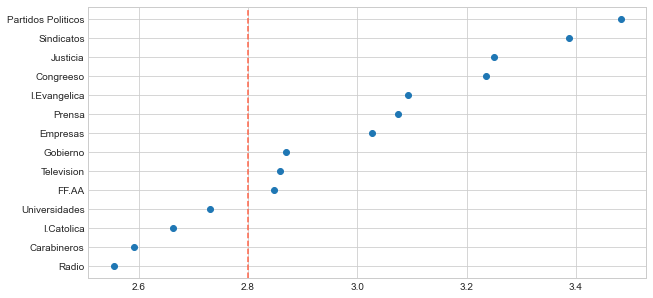

In [11]:
plt.plot(tmp_df['mean'], tmp_df['var'], 'o')
plt.axvline(x = 2.8, linestyle = '--', color = 'tomato');

Sabemos que el 1 es mayor confianza y 4 es menor confianza en las instituciones

- Se puede decir que tomando como corte entre poca confianza y mejor confianza 2.8
- Se observa quee dentro de las instituciones las que presentan una mayor confianza son radio, carabineros y la Iglesia Catolica.
- Aquellas que presentan la menor confianza son Partidos politicos, Sindicatos, Justicia y el Congreso

### Supuestos de Ideonidad factorial

In [12]:
factor.calculate_bartlett_sphericity(trust_df)

(6644.835705911948, 0.0)

- Nuestro segundo argumento p-value indica que existe informacion suficiente para rechazar hipotesis nula, estamos en condiciones para decir que al menos existe un nivel de covarianza entre los items

In [13]:
factor.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]),
 0.9274657194111267)

- Como el KMO global (0.9274) es mayor a 0.7, podemos decir que al menos hay un factor latente que es importante a considerar
- Si se tiene un KMO global bajo 0.7 o si se observa algun valor con un kmo bajo 0.7, se recomienda sacarlos de la muestra y volver a ejecutar la prueba

### Definiendo cantidad de factores

In [14]:
# 1. Se debe indicar la cantidad de factores al instanciar la clase, y el método de rotación en el atributo "rotation"
factorize = factor.FactorAnalyzer(n_factors=7, rotation="varimax")

In [15]:
# 2. Se debe llamar al método fit, pasando como argumento el set de datos
factorize.fit(trust_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=7, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [16]:
# 3. Se pueden obtener los eigenvalues accediendo al método get_eigenvalues, luego de aplicar fit
factor_eigenvalues = factorize.get_eigenvalues()[0]
factor_eigenvalues

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

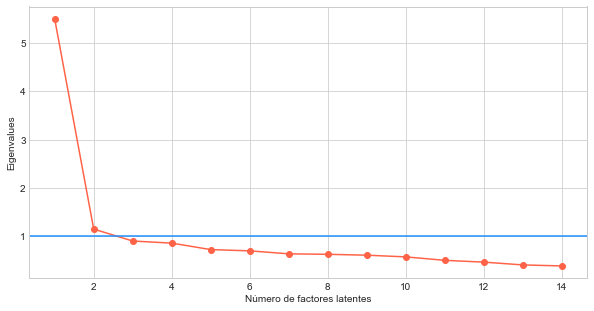

In [17]:
# 4. Al momento de graficar, debemos asignar en el eje x una lista o arreglo de valores de 1 a n,
# siendo n la cantidad de eigenvalues obtenidos. Y en el eje y los eigenvalues obtenidos.
plt.plot(np.arange(1,len(factor_eigenvalues) + 1), factor_eigenvalues, "o-", color="tomato");
plt.xlabel("Número de factores latentes");
plt.ylabel("Eigenvalues");
plt.axhline(1, color="dodgerblue")
plt.show()

- Se toma como limite todas aquellas que estan sobre el corte que sera Eigenvalues > 1, por lo que en este caso se tomarian 2 categorias latentes

In [18]:
# 5. Se actualiza la cantidad de factores, y se aplica fit
factorize_dos = factor.FactorAnalyzer(n_factors=2, rotation="varimax")
factorize_dos.fit(trust_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [19]:
# 6. Para ver las cargas de cada factor, se accede a loadings_ dentro del objeto ya fiteado
factorize_dos.loadings_

array([[0.2115378 , 0.48207631],
       [0.18909242, 0.31556017],
       [0.44635957, 0.4410592 ],
       [0.49501859, 0.36986145],
       [0.39299558, 0.50611705],
       [0.20838917, 0.70006651],
       [0.50838434, 0.18316639],
       [0.24972885, 0.5685152 ],
       [0.51311237, 0.45708089],
       [0.66688535, 0.28831161],
       [0.72624282, 0.21479004],
       [0.56733533, 0.31276563],
       [0.44188951, 0.33202866],
       [0.24208803, 0.57256938]])

In [20]:
# 7. Podemos generar un DataFrame de la siguiente forma
loadings_df = pd.DataFrame(factorize_dos.loadings_, columns=["Factor1", "Factor2"] ,index=trust_df.columns)
loadings_df

,Factor1,Factor2
I.Catolica,0.211538,0.482076
I.Evangelica,0.189092,0.315560
FF.AA,0.446360,0.441059
Justicia,0.495019,0.369861
Prensa,0.392996,0.506117
Television,0.208389,0.700067
Sindicatos,0.508384,0.183166
Carabineros,0.249729,0.568515
Gobierno,0.513112,0.457081
Partidos Politicos,0.666885,0.288312


In [21]:
# 8. Destacar cargas 
loadings_df.applymap(lambda x: np.where(x < .4, " ", round(x, 2)))

,Factor1,Factor2
I.Catolica,,0.48
I.Evangelica,,
FF.AA,0.45,0.44
Justicia,0.5,
Prensa,,0.51
Television,,0.7
Sindicatos,0.51,
Carabineros,,0.57
Gobierno,0.51,0.46
Partidos Politicos,0.67,


***Interpretacion cargas***

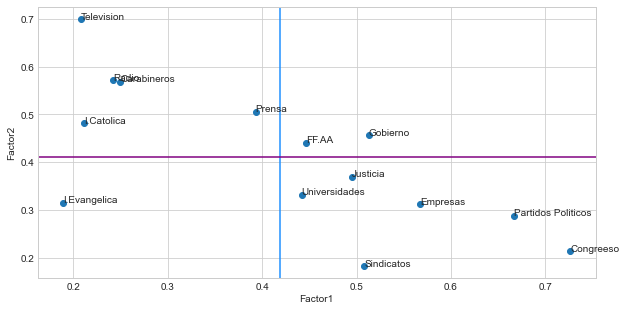

In [22]:

plt.plot(loadings_df.Factor1, loadings_df.Factor2, "o")
plt.xlabel("Factor1")
plt.ylabel("Factor2")

for i, text in enumerate(loadings_df.index):
    plt.annotate(text, (loadings_df["Factor1"][i], loadings_df["Factor2"][i]))
    
plt.axvline(loadings_df["Factor1"].mean(), color="dodgerblue")
plt.axhline(loadings_df["Factor2"].mean(), color="purple")
plt.show()

In [23]:
# 9. Varianza de factores como DF
factor_var = factorize_dos.get_factor_variance()
df_fv = pd.DataFrame(
    factor_var, 
    columns=["Factor1", "Factor2"],
    index=["Sum of squared loadings (variance)", "Proportional variance", "Cumulative variance"] # Obtenido de documentación
)
df_fv

,Factor1,Factor2
Sum of squared loadings (variance),2.854667,2.640396
Proportional variance,0.203905,0.188600
Cumulative variance,0.203905,0.392504


- Se observa que cada una de estas dimensiones explica en un 20% y 18.8% respectivamente (Proportional variance) la variabilidad de los puntajes de estas dimensiones.

In [24]:
# 10. Obtención de scores: Usar método transform
scores = factorize_dos.transform(trust_df)
scores

array([[-0.67809168,  0.33784116],
       [-0.0480973 , -0.00985878],
       [ 0.54219961,  0.42465026],
       ...,
       [-0.22806842,  0.13539122],
       [-0.03749915, -0.04883834],
       [ 4.13069654, -0.00732222]])

In [25]:
score_df = pd.DataFrame(scores, columns=["Factor1", "Factor2"])
score_df

,Factor1,Factor2
0,-0.678092,0.337841
1,-0.048097,-0.009859
2,0.542200,0.424650
3,0.045754,-0.426908
4,-0.925561,-0.673218
...,...,...
1498,0.383273,1.194171
1499,-0.481809,0.598618
1500,-0.228068,0.135391
1501,-0.037499,-0.048838


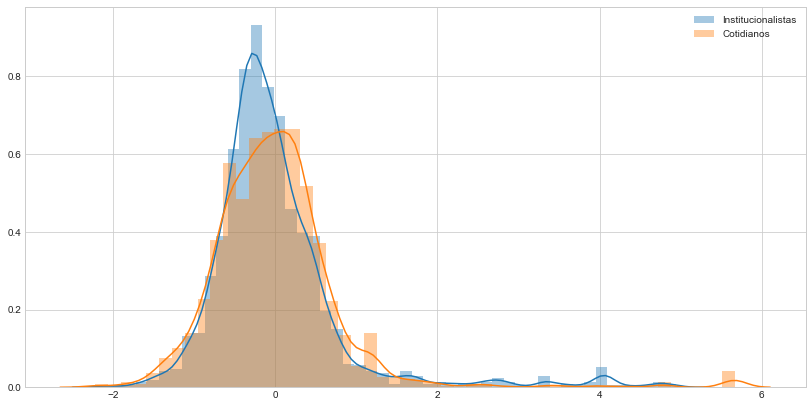

In [26]:
# 11. Distribuciones
plt.figure(figsize=(14,7))
sns.distplot(scores[:,0], label="Institucionalistas")
sns.distplot(scores[:,1], label="Cotidianos")
plt.legend();

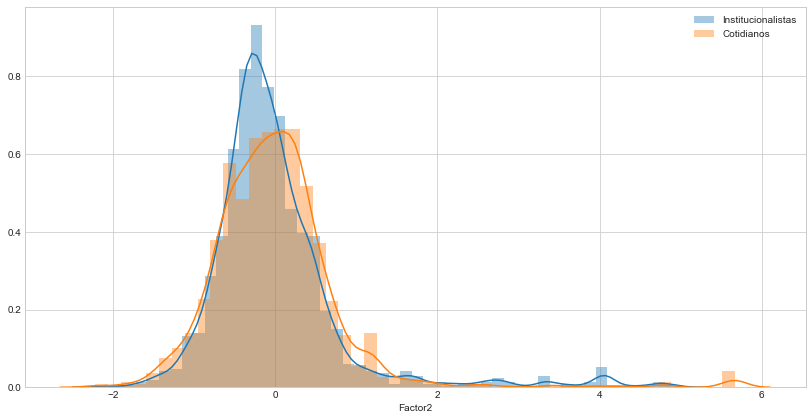

In [27]:
# 11. Distribuciones
plt.figure(figsize=(14,7))
sns.distplot(score_df['Factor1'], label="Institucionalistas")
sns.distplot(score_df['Factor2'], label="Cotidianos")
plt.legend();

- Se puede observar que existe una leve inclinacion hacia valores mas positivos en aquellos factores cotidianos
- Se podria desprender que existe una mejor. evaluacion sobre aquellas instituciones cotidianas que institucionales

### Machine Learning

#### Analisis de Componentes Principales

In [28]:
from sklearn.datasets import load_digits

df = load_digits()

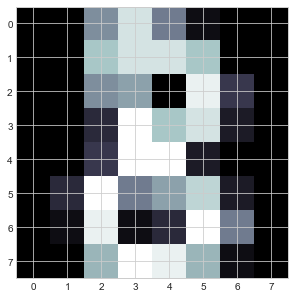

In [29]:
plt.imshow(df.data[8].reshape([8,8]), cmap = 'bone');

In [30]:
from sklearn.decomposition import PCA

In [31]:
dimred = PCA(n_components = 2)

In [32]:
project_x = dimred.fit_transform(df.data)

In [33]:
df.data.shape

(1797, 64)

In [34]:
project_x.shape

(1797, 2)

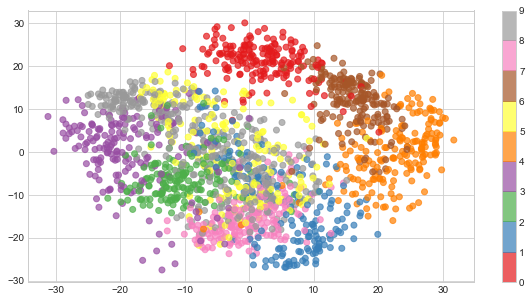

In [35]:
plt.scatter(project_x[:, 0], project_x[:, 1], c = df.target, alpha = 0.7, cmap = 'Set1')
plt.colorbar();

In [36]:
dimred.explained_variance_ratio_

array([0.14890594, 0.13618771])

- Se observa que la dimension 1 explica aprox el 15% y la dimension 2 un 13.6%. En conjunto ambas dimensiones explican el 28% de la varianza

In [37]:
fetch_dim = PCA().fit(df.data)
n_dims = len(fetch_dim.components_)

In [38]:
n_dims

64

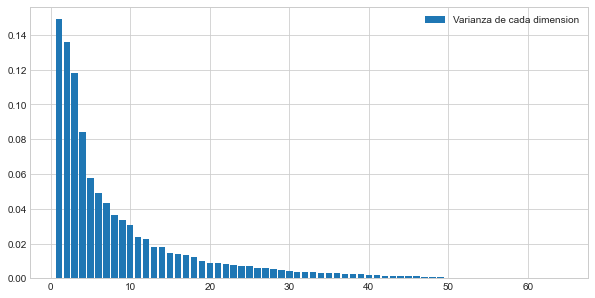

In [39]:
plt.bar(range(1, n_dims +1), fetch_dim.explained_variance_ratio_,
        label = 'Varianza de cada dimension')
plt.legend();

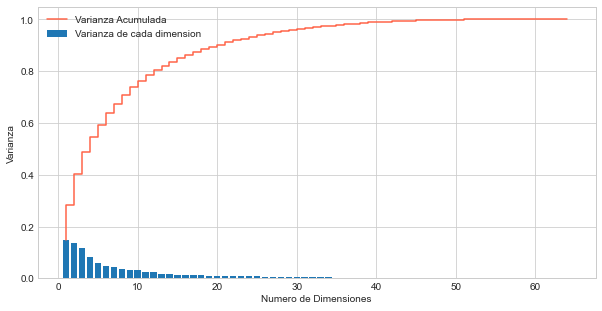

In [40]:
plt.bar(range(1, n_dims +1), fetch_dim.explained_variance_ratio_,
        label = 'Varianza de cada dimension')
plt.step(range(1, n_dims +1), np.cumsum(fetch_dim.explained_variance_ratio_),
         color = 'tomato', label = 'Varianza Acumulada')
plt.xlabel('Numero de Dimensiones')
plt.ylabel('Varianza')
plt.legend();

- Se observa que al parecer con 10 dimnsiones se captura un gran porcentaje de la varianza

In [41]:
# Verificando cuanto se captura de la varianza
pca = PCA(n_components=10)
project_x = pca.fit_transform(df.data)
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496352,
       0.59413262, 0.63729249, 0.67390615, 0.7074386 , 0.73822606])

- Se observa que con 10 dimensiones se captura aprox el 74% de la varianza

### Clustering

In [42]:
# Generamos un espacio de prueba

from sklearn.datasets import make_blobs

bivariate_mu_params = list([[0.2, 2.3], [-1.5, 2.3],
                            [-2.8, 1.8], [-1.8, 2.8],
                            [-0.8, 1.3], [0.3, 2.1],
                            [0.4, 3]])
bivariate_sigma_params = list([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

X_mat, y_vec = make_blobs(n_samples=3000, centers=bivariate_mu_params,
                          cluster_std=bivariate_sigma_params, random_state=11238)

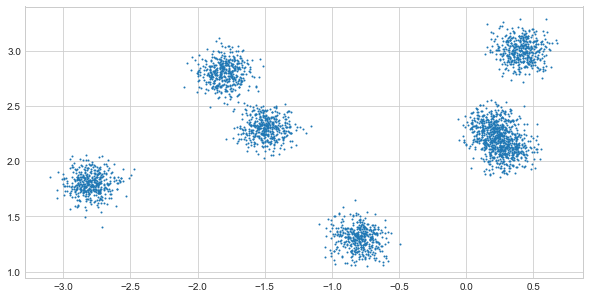

In [43]:
plt.scatter(X_mat[:, 0], X_mat[:, 1], s = 1);

In [44]:
from sklearn.cluster import KMeans

# sabemos con anterioridad que hay 7 cluster (bivariate_sigma_params)
kmeans = KMeans(n_clusters = 7, random_state=11238)
fit_results = kmeans.fit_predict(X_mat)

In [45]:
kmeans.labels_

array([2, 5, 0, ..., 0, 0, 6], dtype=int32)

In [46]:
pd.Series(kmeans.labels_).value_counts('%')

6    0.144000
1    0.143667
3    0.143000
4    0.142667
2    0.142667
5    0.142333
0    0.141667
dtype: float64

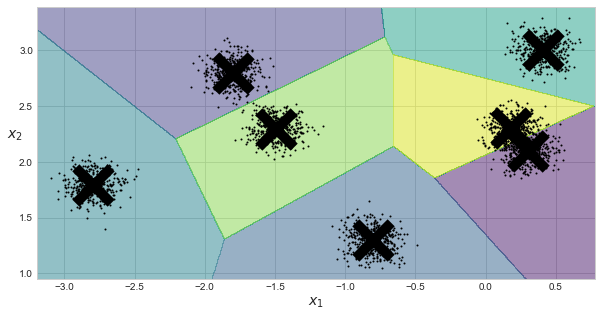

In [47]:
gfx.plot_decision_boundaries(kmeans, X_mat)

#### ¿Que pasa si no sabemos los cluster existentes?

In [48]:
kmeans.inertia_

56.26155584400721

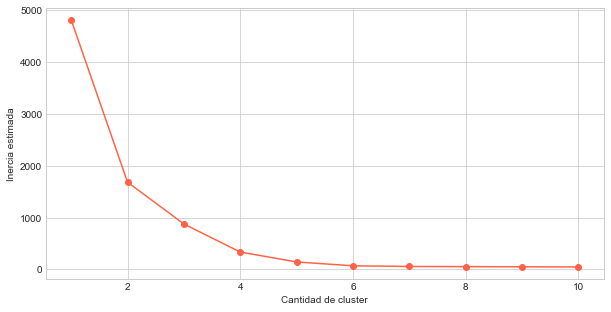

In [49]:
inertia = []

for i in range(1, 11):
    inertia.append(KMeans(n_clusters = i, random_state = 11238).fit(X_mat).inertia_)
    
plt.plot(range(1, 11), inertia, 'o-', color = 'tomato')
plt.xlabel('Cantidad de cluster')
plt.ylabel('Inercia estimada')
plt.show()

- De acuerdo al grafico, con k = 4 es el punto de inflexión previo a estabilizar la inercia del modelo

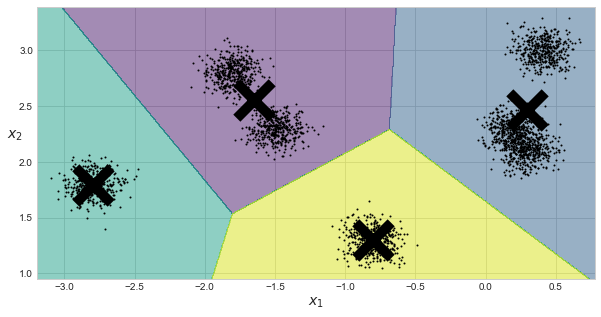

In [50]:
# generando un modelo con k = 4

kmeans = KMeans(n_clusters=4, random_state=11238, n_init = 100) # n_init = 100 es para estabilizar modelo y evitar variabilidad
fit_results = kmeans.fit_predict(X_mat)
gfx.plot_decision_boundaries(kmeans, X_mat)